# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [246]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
%matplotlib inline

manga = pd.read_csv('manga.csv')
anime = pd.read_csv('anime.csv')

In [247]:
anime.isnull().sum()
#glad theres no missing titles, makes sense for end date to have nulls as shows are still updating, popularity numbers also change
#with popularity polls and anime of the season, ranks is the same.  

id                                 0
title                              0
media_type                         0
mean                            9855
num_scoring_users                  0
status                             0
num_episodes                     804
start_date                      2847
end_date                        4296
source                          3768
num_list_users                     0
popularity                      3465
num_favorites                      0
rank                            5367
average_episode_duration         918
rating                          1009
start_season_year               6451
start_season_season             6451
broadcast_day_of_the_week      20972
broadcast_start_time           21108
genres                             0
studios                            0
synopsis                        3261
nsfw                               0
created_at                         0
updated_at                         0
main_picture_medium             2835
m

In [248]:
anime.head()
#manga.head()

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,studios,synopsis,nsfw,created_at,updated_at,main_picture_medium,main_picture_large,alternative_titles_en,alternative_titles_ja,alternative_titles_synonyms
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1848530,finished_airing,64.0,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,['Bones'],After a horrific alchemy experiment goes wrong...,white,2008-08-21 03:35:22,2022-04-18 05:06:13,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,['Hagane no Renkinjutsushi: Fullmetal Alchemis...
1,11061,Hunter x Hunter (2011),tv,9.05,1491056,finished_airing,148.0,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,"['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,white,2011-07-27 08:41:39,2022-04-18 05:11:21,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,['HxH (2011)']
2,9253,Steins;Gate,tv,9.08,1241454,finished_airing,24.0,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,['White Fox'],Eccentric scientist Rintarou Okabe has a never...,white,2010-07-26 09:23:40,2022-05-01 21:24:42,https://api-cdn.myanimelist.net/images/anime/5...,https://api-cdn.myanimelist.net/images/anime/5...,Steins;Gate,STEINS;GATE,[]
3,21,One Piece,tv,8.65,1079359,currently_airing,NaN,1999-10-20 00:00:00,NaN,manga,...,['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",white,2005-11-11 01:20:50,2022-04-18 05:12:08,https://api-cdn.myanimelist.net/images/anime/6...,https://api-cdn.myanimelist.net/images/anime/6...,One Piece,ONE PIECE,['OP']
4,1535,Death Note,tv,8.62,2429917,finished_airing,37.0,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",white,2006-10-04 03:39:19,2022-04-18 04:59:29,https://api-cdn.myanimelist.net/images/anime/9...,https://api-cdn.myanimelist.net/images/anime/9...,Death Note,デスノート,['DN']


In [249]:
manga.isnull().sum()

id                                 0
title                              0
media_type                         0
mean                           44941
num_scoring_users                  0
status                             0
num_volumes                    16335
num_chapters                   19849
start_date                      4250
end_date                       15190
num_list_users                     0
popularity                      7208
num_favorites                      0
rank                           25729
genres                             0
authors                            0
synopsis                       21515
nsfw                               0
created_at                         0
updated_at                         0
main_picture_medium             2404
main_picture_large              2404
alternative_titles_en          48445
alternative_titles_ja           2181
alternative_titles_synonyms        0
dtype: int64

In [250]:
anime.columns
# looking at the columns i'm probably going to get rid off broadcast day of the week, main pictures, alternative titles
#start season year maybe and start season season.

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users', 'status',
       'num_episodes', 'start_date', 'end_date', 'source', 'num_list_users',
       'popularity', 'num_favorites', 'rank', 'average_episode_duration',
       'rating', 'start_season_year', 'start_season_season',
       'broadcast_day_of_the_week', 'broadcast_start_time', 'genres',
       'studios', 'synopsis', 'nsfw', 'created_at', 'updated_at',
       'main_picture_medium', 'main_picture_large', 'alternative_titles_en',
       'alternative_titles_ja', 'alternative_titles_synonyms'],
      dtype='object')

In [251]:
manga.columns
#looking at the columns is giving me an idea of some that will probably be dropped as theres no use for them like 
#main pictures, alternative titles and probably nsfw

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users', 'status',
       'num_volumes', 'num_chapters', 'start_date', 'end_date',
       'num_list_users', 'popularity', 'num_favorites', 'rank', 'genres',
       'authors', 'synopsis', 'nsfw', 'created_at', 'updated_at',
       'main_picture_medium', 'main_picture_large', 'alternative_titles_en',
       'alternative_titles_ja', 'alternative_titles_synonyms'],
      dtype='object')

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [252]:
anime[anime['synopsis'].isna()]
#looks like it,s movies or not aired yet so i,m goign to get rid of them since it doesn't help the dataset.

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,studios,synopsis,nsfw,created_at,updated_at,main_picture_medium,main_picture_large,alternative_titles_en,alternative_titles_ja,alternative_titles_synonyms
802,48548,5-toubun no Hanayome Movie,movie,7.23,1462,finished_airing,1.0,2022-05-20 00:00:00,2022-05-20 00:00:00,manga,...,['Bibury Animation Studios'],NaN,white,2021-03-25 18:04:13,2022-04-18 02:04:05,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,The Quintessential Quintuplets Movie,映画 五等分の花嫁,"['Gotoubun no Hanayome', 'The Five Wedded Brid..."
829,41467,Bleach: Sennen Kessen-hen,tv,NaN,10,not_yet_aired,NaN,2022-10-01 00:00:00,NaN,manga,...,['Pierrot'],NaN,white,2020-03-18 09:10:15,2022-06-20 23:09:19,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Bleach: Thousand-Year Blood War,BLEACH 千年血戦篇,['Bleach: Thousand-Year Blood War Arc']
941,48585,Black Clover Movie,movie,NaN,5,not_yet_aired,1.0,2023-01-01 00:00:00,2023-01-01 00:00:00,manga,...,[],NaN,white,2021-03-28 17:43:00,2022-04-18 04:29:15,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,NaN,NaN,[]
967,51535,Shingeki no Kyojin: The Final Season - Kankets...,tv,NaN,16,not_yet_aired,NaN,2023-01-01 00:00:00,NaN,manga,...,['MAPPA'],NaN,white,2022-04-03 15:34:50,2022-04-18 04:40:12,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Attack on Titan: The Final Season Part 3,進撃の巨人 The Final Season完結編,['Shingeki no Kyojin: The Final Season Part 3'...
1745,41497,Fate/Grand Order: Shuukyoku Tokuiten - Kani Ji...,movie,7.88,17054,finished_airing,1.0,2021-07-30 00:00:00,2021-07-30 00:00:00,game,...,['CloverWorks'],NaN,white,2020-03-22 02:27:10,2022-04-17 16:48:02,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Fate/Grand Order: Final Singularity - Grand Te...,Fate/Grand Order -終局特異点 冠位時間神殿ソロモン-,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24012,44031,Jushen Zhan Ji Dui: Guidao Xianfeng,tv,NaN,2,finished_airing,52.0,2020-01-01 00:00:00,NaN,original,...,[],NaN,white,2020-11-16 06:52:58,2022-04-16 20:21:25,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,NaN,巨神战击队之轨道先锋,[]
24013,44287,Bai Bian Ji Shou: Luo Luo Lixian Ji,tv,NaN,2,finished_airing,52.0,2008-01-01 00:00:00,NaN,original,...,[],NaN,white,2020-12-05 07:05:52,2022-04-18 16:25:28,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,RoboWarriors,百变机兽之洛洛历险记,[]
24016,45823,Luo Baobei 3rd Season,tv,NaN,2,finished_airing,26.0,2018-01-01 00:00:00,NaN,original,...,[],NaN,white,2021-01-10 15:34:15,2022-04-18 11:45:59,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,NaN,洛宝贝 第三季,[]
24021,50431,Xiling Diguo,ona,NaN,0,not_yet_aired,NaN,NaN,NaN,novel,...,['Wawayu Animation'],NaN,white,2021-11-22 16:06:45,2022-02-21 21:32:12,https://api-cdn.myanimelist.net/images/anime/1...,https://api-cdn.myanimelist.net/images/anime/1...,Xyrin Empire,希灵帝国,[]


In [253]:
manga[manga['synopsis'].isna()]
# anything without a mean will be gone, maybe will get rid of light novels too. 

,id,title,media_type,mean,num_scoring_users,status,num_volumes,num_chapters,start_date,end_date,...,authors,synopsis,nsfw,created_at,updated_at,main_picture_medium,main_picture_large,alternative_titles_en,alternative_titles_ja,alternative_titles_synonyms
937,133926,Solo Leveling,light_novel,NaN,0,finished,14.0,270.0,NaN,NaN,...,[],NaN,gray,1970-01-01 00:00:00,2022-04-17 23:50:38,NaN,NaN,Solo Leveling,NaN,['I Level Up Alone']
1155,77849,Beelzebub,light_novel,7.65,508,finished,3.0,NaN,2011-05-02 00:00:00,2012-09-04 00:00:00,...,"['Tamura, Ryuuhei (Art)', 'SOW (Story']",NaN,white,1970-01-01 00:00:00,2022-06-17 16:19:04,https://api-cdn.myanimelist.net/images/manga/3...,https://api-cdn.myanimelist.net/images/manga/3...,NaN,べるぜバブ,"['BeelBeel☆Saiyuuki', 'BeelBeel☆Time Trouble',..."
1203,123897,Solo Leveling,light_novel,NaN,0,finished,14.0,270.0,NaN,NaN,...,[],NaN,gray,1970-01-01 00:00:00,2022-03-15 09:50:59,NaN,NaN,Solo Leveling,NaN,[]
1212,102875,Fata Morgana no Yakata: Anata no Genten ni Ita...,light_novel,7.91,313,finished,5.0,21.0,2014-08-08 00:00:00,2016-01-14 00:00:00,...,"['Hanada, Keika (Story)', 'Moyataro (Art']",NaN,white,1970-01-01 00:00:00,2022-04-17 20:14:28,https://api-cdn.myanimelist.net/images/manga/2...,https://api-cdn.myanimelist.net/images/manga/2...,NaN,ファタモルガーナの館 ―The house in Fata morgana― あなたの原典に...,[]
1296,10376,Cavalier of the Abyss,manhwa,7.57,4443,finished,24.0,144.0,2008-01-01 00:00:00,2018-12-15 00:00:00,...,"['Juder (Art', 'Deo, JYU (Story & Art)']",NaN,white,1970-01-01 00:00:00,2022-03-14 21:15:12,https://api-cdn.myanimelist.net/images/manga/3...,https://api-cdn.myanimelist.net/images/manga/3...,NaN,심연의 카발리어,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66593,127999,Brown Sugar Days,manga,NaN,61,finished,1.0,9.0,2017-09-16 00:00:00,2018-05-16 00:00:00,...,"['Sakiyo, Cake (Story & Art)']",NaN,gray,1970-01-01 00:00:00,2020-10-30 16:54:58,https://api-cdn.myanimelist.net/images/manga/1...,https://api-cdn.myanimelist.net/images/manga/1...,NaN,ブラウンシュガァデイズ,[]
66594,62719,Gakuen Sweet Pai: Uruwashi no Seitokai Shikkoubu,light_novel,NaN,5,finished,1.0,4.0,2006-09-17 00:00:00,2006-09-17 00:00:00,...,"['Onogawa, Kiwi (Art)', 'Habara, Tetsu (Story)']",NaN,gray,1970-01-01 00:00:00,2015-10-01 23:44:52,https://api-cdn.myanimelist.net/images/manga/2...,https://api-cdn.myanimelist.net/images/manga/2...,NaN,学園すいーとパイ 麗しの生徒会執行部,[]
66597,63743,Kotonoha Tsukai wa Sasayakanai,light_novel,NaN,3,finished,2.0,NaN,2009-11-25 00:00:00,2010-03-25 00:00:00,...,"['CH@R (Art', 'Kimura, Kou (Story)']",NaN,white,1970-01-01 00:00:00,2014-05-17 03:48:31,https://api-cdn.myanimelist.net/images/manga/2...,https://api-cdn.myanimelist.net/images/manga/2...,NaN,コトノハ遣いは囁かない,[]
66598,63999,Eien no Shouzou,one_shot,NaN,67,finished,NaN,1.0,2013-07-20 00:00:00,2013-07-20 00:00:00,...,['Makio (Story & Art'],NaN,gray,1970-01-01 00:00:00,2021-09-23 06:39:11,https://api-cdn.myanimelist.net/images/manga/1...,https://api-cdn.myanimelist.net/images/manga/1...,NaN,永遠の肖像,['Portrait of Eternal']


In [254]:
total_cells = np.product(anime.shape)

missing_cells = pd.isnull(anime).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data") 


#-------------------------------------------------------------

total_cells = np.product(manga.shape)

missing_cells = pd.isnull(manga).sum()

total_missing = missing_cells.sum()

percentage_missing = round((total_missing/total_cells), 2) *100

print(percentage_missing, "% Missing cells from the data") 



#15% data missing from anime and 13% data missing from manga.

15.0 % Missing cells from the data
13.0 % Missing cells from the data


In [255]:
anime_c = anime.drop(['main_picture_medium','main_picture_large','alternative_titles_ja','alternative_titles_synonyms','broadcast_start_time','broadcast_day_of_the_week'],axis =1)
anime_c
#anime_c = anime clean, i'm dropping columns that are not needed for my purpose withe the dataset.

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,rating,start_season_year,start_season_season,genres,studios,synopsis,nsfw,created_at,updated_at,alternative_titles_en
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1848530,finished_airing,64.0,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,r,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Bones'],After a horrific alchemy experiment goes wrong...,white,2008-08-21 03:35:22,2022-04-18 05:06:13,Fullmetal Alchemist: Brotherhood
1,11061,Hunter x Hunter (2011),tv,9.05,1491056,finished_airing,148.0,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,pg_13,2011.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,white,2011-07-27 08:41:39,2022-04-18 05:11:21,Hunter x Hunter
2,9253,Steins;Gate,tv,9.08,1241454,finished_airing,24.0,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,pg_13,2011.0,spring,"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['White Fox'],Eccentric scientist Rintarou Okabe has a never...,white,2010-07-26 09:23:40,2022-05-01 21:24:42,Steins;Gate
3,21,One Piece,tv,8.65,1079359,currently_airing,NaN,1999-10-20 00:00:00,NaN,manga,...,pg_13,1999.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",white,2005-11-11 01:20:50,2022-04-18 05:12:08,One Piece
4,1535,Death Note,tv,8.62,2429917,finished_airing,37.0,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,r,2006.0,fall,"['Psychological', 'Shounen', 'Supernatural', '...",['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",white,2006-10-04 03:39:19,2022-04-18 04:59:29,Death Note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24019,47103,Xiao Feiji Ka Ka,tv,NaN,0,finished_airing,104.0,NaN,NaN,original,...,pg,NaN,NaN,['Kids'],[],Kaka and his partners are a group of cute litt...,gray,2021-01-31 02:53:19,2021-01-31 02:53:19,NaN
24020,47359,Sai Ya Lixian Ji,tv,NaN,0,finished_airing,20.0,NaN,NaN,original,...,pg,NaN,NaN,['Kids'],[],It (animation) will let people all over the co...,gray,2021-02-03 14:27:58,2021-02-05 07:05:54,NaN
24021,50431,Xiling Diguo,ona,NaN,0,not_yet_aired,NaN,NaN,NaN,novel,...,pg_13,NaN,NaN,"['Action', 'Fantasy']",['Wawayu Animation'],NaN,white,2021-11-22 16:06:45,2022-02-21 21:32:12,Xyrin Empire
24022,50687,Pochi Hana,movie,NaN,19,finished_airing,1.0,2016-12-02 00:00:00,2016-12-02 00:00:00,original,...,g,2016.0,fall,['Slice of Life'],[],A story about a young girl named Hana and her ...,white,2021-12-28 19:43:56,2022-04-24 17:00:05,NaN


In [309]:
manga_c = manga.drop(['main_picture_medium','main_picture_large','alternative_titles_ja','alternative_titles_synonyms'],axis =1)
manga_c
#manga_c = manga clean dropping unhelpful data columns

,id,title,media_type,mean,num_scoring_users,status,num_volumes,num_chapters,start_date,end_date,...,popularity,num_favorites,rank,genres,authors,synopsis,nsfw,created_at,updated_at,alternative_titles_en
0,2,Berserk,manga,9.45,262620,currently_publishing,NaN,NaN,1989-08-25 00:00:00,NaN,...,2.0,101786,1.0,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Miura, Kentarou (Story & Art)', 'Studio Gaga...","Guts, a former mercenary now known as the ""Bla...",white,1970-01-01 00:00:00,2022-06-23 08:30:44,Berserk
1,13,One Piece,manga,9.19,300393,currently_publishing,NaN,NaN,1997-07-22 00:00:00,NaN,...,3.0,97900,3.0,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Oda, Eiichiro (Story & Art)']","Gol D. Roger, a man referred to as the ""Pirate...",white,1970-01-01 00:00:00,2022-04-18 04:48:35,One Piece
2,23390,Shingeki no Kyojin,manga,8.57,359676,finished,34.0,141.0,2009-09-09 00:00:00,2021-04-09 00:00:00,...,1.0,66779,90.0,"['Action', 'Award Winning', 'Drama', 'Gore', '...","['Isayama, Hajime (Story & Art)']","Hundreds of years ago, horrifying creatures wh...",white,1970-01-01 00:00:00,2022-04-18 05:10:58,Attack on Titan
3,116778,Chainsaw Man,manga,8.72,256830,finished,11.0,97.0,2018-12-03 00:00:00,2020-12-14 00:00:00,...,5.0,56902,44.0,"['Action', 'Adventure', 'Award Winning', 'Gore...","['Fujimoto, Tatsuki (Story & Art)']",Denji has a simple dream—to live a happy and p...,white,1970-01-01 00:00:00,2022-04-18 05:11:25,Chainsaw Man
4,4632,Oyasumi Punpun,manga,9.03,138251,finished,13.0,147.0,2007-03-15 00:00:00,2013-11-02 00:00:00,...,12.0,42523,9.0,"['Drama', 'Psychological', 'Seinen', 'Slice of...","['Asano, Inio (Story & Art)']",Punpun Onodera is a normal 11-year-old boy liv...,white,1970-01-01 00:00:00,2022-04-18 04:47:05,Goodnight Punpun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66596,129023,Omega-sama wa Ai wo Shiranai,manga,NaN,31,finished,1.0,8.0,2019-05-08 00:00:00,2020-03-07 00:00:00,...,38738.0,0,NaN,"['Boys Love', 'Erotica']",['Fujiokayu (Story & Art'],"Isetani, an alpha who is an elite employee at ...",gray,1970-01-01 00:00:00,2021-12-06 17:59:05,NaN
66597,63743,Kotonoha Tsukai wa Sasayakanai,light_novel,NaN,3,finished,2.0,NaN,2009-11-25 00:00:00,2010-03-25 00:00:00,...,51533.0,0,31790.0,"['Fantasy', 'School']","['CH@R (Art', 'Kimura, Kou (Story)']",NaN,white,1970-01-01 00:00:00,2014-05-17 03:48:31,NaN
66598,63999,Eien no Shouzou,one_shot,NaN,67,finished,NaN,1.0,2013-07-20 00:00:00,2013-07-20 00:00:00,...,32008.0,0,NaN,['Hentai'],['Makio (Story & Art'],NaN,gray,1970-01-01 00:00:00,2021-09-23 06:39:11,NaN
66599,65023,Sakuretsu Eropai Dynamite,manga,NaN,8,finished,1.0,10.0,2000-08-01 00:00:00,2000-08-01 00:00:00,...,46834.0,0,NaN,['Hentai'],"['Yoshiama, Renzou (Story & Art)']",1. Jokyoushi on Himitsu\n2-3. Nichijou no Inu\...,gray,1970-01-01 00:00:00,2014-05-24 19:33:17,NaN


In [310]:
anime_B = anime_c.drop(anime_c.index[anime_c['status'] == 'not_yet_aired'], inplace=True)
anime_B
#anime_b = anime better and cleaner, in this section im taking away the anime that has not yet aired as it doesnt have a score
#so it's useless to me

In [311]:
anime_B = anime_c[anime_c.media_type != 'ona']
anime_B
#getting ride of ona since they are not relevant.

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,rating,start_season_year,start_season_season,genres,studios,synopsis,nsfw,created_at,updated_at,alternative_titles_en
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1848530,finished_airing,64.0,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,r,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Bones'],After a horrific alchemy experiment goes wrong...,white,2008-08-21 03:35:22,2022-04-18 05:06:13,Fullmetal Alchemist: Brotherhood
1,11061,Hunter x Hunter (2011),tv,9.05,1491056,finished_airing,148.0,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,pg_13,2011.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,white,2011-07-27 08:41:39,2022-04-18 05:11:21,Hunter x Hunter
2,9253,Steins;Gate,tv,9.08,1241454,finished_airing,24.0,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,pg_13,2011.0,spring,"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['White Fox'],Eccentric scientist Rintarou Okabe has a never...,white,2010-07-26 09:23:40,2022-05-01 21:24:42,Steins;Gate
3,21,One Piece,tv,8.65,1079359,currently_airing,NaN,1999-10-20 00:00:00,NaN,manga,...,pg_13,1999.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",white,2005-11-11 01:20:50,2022-04-18 05:12:08,One Piece
4,1535,Death Note,tv,8.62,2429917,finished_airing,37.0,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,r,2006.0,fall,"['Psychological', 'Shounen', 'Supernatural', '...",['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",white,2006-10-04 03:39:19,2022-04-18 04:59:29,Death Note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24017,46591,Tian Tian Quan Baobei Zhi Feixing Leyuan,tv,NaN,0,finished_airing,25.0,NaN,NaN,original,...,pg,NaN,NaN,['Adventure'],[],The donut babies are a group of cute elves. Th...,gray,2021-01-22 16:21:46,2021-01-22 16:21:46,NaN
24018,46847,Mini Tegong Dui X,tv,NaN,0,finished_airing,52.0,NaN,NaN,original,...,pg,NaN,NaN,['Fantasy'],[],"In the vast universe, after a long period of t...",gray,2021-01-26 07:43:47,2021-01-26 07:43:47,NaN
24019,47103,Xiao Feiji Ka Ka,tv,NaN,0,finished_airing,104.0,NaN,NaN,original,...,pg,NaN,NaN,['Kids'],[],Kaka and his partners are a group of cute litt...,gray,2021-01-31 02:53:19,2021-01-31 02:53:19,NaN
24020,47359,Sai Ya Lixian Ji,tv,NaN,0,finished_airing,20.0,NaN,NaN,original,...,pg,NaN,NaN,['Kids'],[],It (animation) will let people all over the co...,gray,2021-02-03 14:27:58,2021-02-05 07:05:54,NaN


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

<AxesSubplot:>

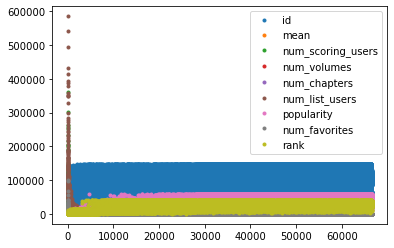

In [312]:
manga_c['genres'].value_counts()
manga_c.plot(style='.')

<AxesSubplot:>

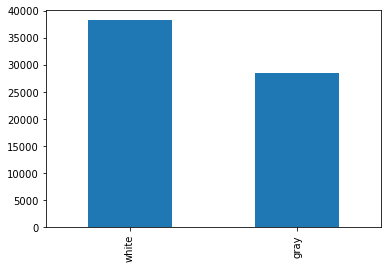

In [313]:
manga_c['nsfw'].value_counts().plot.bar()
#wanted to see how many colors were in the nsfw column.

In [314]:
#anime_B['nsfw'].value_counts().plot.bar()

<AxesSubplot:>

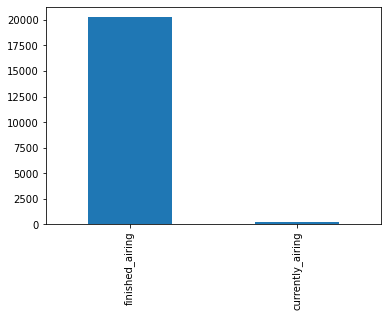

In [315]:
anime_B['status'].value_counts().plot.bar()
#looking at how much anime is currently airing and being scored.


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [316]:
manga_cc = manga_c.drop(['nsfw'], axis=1)
manga_cc
#getting rid if the nsfw since it has no purpose.

,id,title,media_type,mean,num_scoring_users,status,num_volumes,num_chapters,start_date,end_date,num_list_users,popularity,num_favorites,rank,genres,authors,synopsis,created_at,updated_at,alternative_titles_en
0,2,Berserk,manga,9.45,262620,currently_publishing,NaN,NaN,1989-08-25 00:00:00,NaN,540237,2.0,101786,1.0,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Miura, Kentarou (Story & Art)', 'Studio Gaga...","Guts, a former mercenary now known as the ""Bla...",1970-01-01 00:00:00,2022-06-23 08:30:44,Berserk
1,13,One Piece,manga,9.19,300393,currently_publishing,NaN,NaN,1997-07-22 00:00:00,NaN,492829,3.0,97900,3.0,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Oda, Eiichiro (Story & Art)']","Gol D. Roger, a man referred to as the ""Pirate...",1970-01-01 00:00:00,2022-04-18 04:48:35,One Piece
2,23390,Shingeki no Kyojin,manga,8.57,359676,finished,34.0,141.0,2009-09-09 00:00:00,2021-04-09 00:00:00,585148,1.0,66779,90.0,"['Action', 'Award Winning', 'Drama', 'Gore', '...","['Isayama, Hajime (Story & Art)']","Hundreds of years ago, horrifying creatures wh...",1970-01-01 00:00:00,2022-04-18 05:10:58,Attack on Titan
3,116778,Chainsaw Man,manga,8.72,256830,finished,11.0,97.0,2018-12-03 00:00:00,2020-12-14 00:00:00,414732,5.0,56902,44.0,"['Action', 'Adventure', 'Award Winning', 'Gore...","['Fujimoto, Tatsuki (Story & Art)']",Denji has a simple dream—to live a happy and p...,1970-01-01 00:00:00,2022-04-18 05:11:25,Chainsaw Man
4,4632,Oyasumi Punpun,manga,9.03,138251,finished,13.0,147.0,2007-03-15 00:00:00,2013-11-02 00:00:00,347718,12.0,42523,9.0,"['Drama', 'Psychological', 'Seinen', 'Slice of...","['Asano, Inio (Story & Art)']",Punpun Onodera is a normal 11-year-old boy liv...,1970-01-01 00:00:00,2022-04-18 04:47:05,Goodnight Punpun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66596,129023,Omega-sama wa Ai wo Shiranai,manga,NaN,31,finished,1.0,8.0,2019-05-08 00:00:00,2020-03-07 00:00:00,82,38738.0,0,NaN,"['Boys Love', 'Erotica']",['Fujiokayu (Story & Art'],"Isetani, an alpha who is an elite employee at ...",1970-01-01 00:00:00,2021-12-06 17:59:05,NaN
66597,63743,Kotonoha Tsukai wa Sasayakanai,light_novel,NaN,3,finished,2.0,NaN,2009-11-25 00:00:00,2010-03-25 00:00:00,35,51533.0,0,31790.0,"['Fantasy', 'School']","['CH@R (Art', 'Kimura, Kou (Story)']",NaN,1970-01-01 00:00:00,2014-05-17 03:48:31,NaN
66598,63999,Eien no Shouzou,one_shot,NaN,67,finished,NaN,1.0,2013-07-20 00:00:00,2013-07-20 00:00:00,136,32008.0,0,NaN,['Hentai'],['Makio (Story & Art'],NaN,1970-01-01 00:00:00,2021-09-23 06:39:11,NaN
66599,65023,Sakuretsu Eropai Dynamite,manga,NaN,8,finished,1.0,10.0,2000-08-01 00:00:00,2000-08-01 00:00:00,48,46834.0,0,NaN,['Hentai'],"['Yoshiama, Renzou (Story & Art)']",1. Jokyoushi on Himitsu\n2-3. Nichijou no Inu\...,1970-01-01 00:00:00,2014-05-24 19:33:17,NaN


In [317]:
manga_cc.dropna(subset=['mean'])
#getting rid of any manga without a score/mean.

,id,title,media_type,mean,num_scoring_users,status,num_volumes,num_chapters,start_date,end_date,num_list_users,popularity,num_favorites,rank,genres,authors,synopsis,created_at,updated_at,alternative_titles_en
0,2,Berserk,manga,9.45,262620,currently_publishing,NaN,NaN,1989-08-25 00:00:00,NaN,540237,2.0,101786,1.0,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Miura, Kentarou (Story & Art)', 'Studio Gaga...","Guts, a former mercenary now known as the ""Bla...",1970-01-01 00:00:00,2022-06-23 08:30:44,Berserk
1,13,One Piece,manga,9.19,300393,currently_publishing,NaN,NaN,1997-07-22 00:00:00,NaN,492829,3.0,97900,3.0,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Oda, Eiichiro (Story & Art)']","Gol D. Roger, a man referred to as the ""Pirate...",1970-01-01 00:00:00,2022-04-18 04:48:35,One Piece
2,23390,Shingeki no Kyojin,manga,8.57,359676,finished,34.0,141.0,2009-09-09 00:00:00,2021-04-09 00:00:00,585148,1.0,66779,90.0,"['Action', 'Award Winning', 'Drama', 'Gore', '...","['Isayama, Hajime (Story & Art)']","Hundreds of years ago, horrifying creatures wh...",1970-01-01 00:00:00,2022-04-18 05:10:58,Attack on Titan
3,116778,Chainsaw Man,manga,8.72,256830,finished,11.0,97.0,2018-12-03 00:00:00,2020-12-14 00:00:00,414732,5.0,56902,44.0,"['Action', 'Adventure', 'Award Winning', 'Gore...","['Fujimoto, Tatsuki (Story & Art)']",Denji has a simple dream—to live a happy and p...,1970-01-01 00:00:00,2022-04-18 05:11:25,Chainsaw Man
4,4632,Oyasumi Punpun,manga,9.03,138251,finished,13.0,147.0,2007-03-15 00:00:00,2013-11-02 00:00:00,347718,12.0,42523,9.0,"['Drama', 'Psychological', 'Seinen', 'Slice of...","['Asano, Inio (Story & Art)']",Punpun Onodera is a normal 11-year-old boy liv...,1970-01-01 00:00:00,2022-04-18 04:47:05,Goodnight Punpun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66505,93183,Usagi-kun no Shitsukekata.,manga,6.86,144,finished,NaN,3.0,2015-02-20 00:00:00,2015-06-05 00:00:00,630,15998.0,0,9550.0,"['Comedy', 'School', 'Shoujo']","['Eban, Fumi (Story & Art)']",NaN,1970-01-01 00:00:00,2015-09-24 16:20:15,NaN
66513,95487,Santa Claus wa Blue,one_shot,6.71,116,finished,NaN,1.0,2015-11-13 00:00:00,2015-11-13 00:00:00,278,23930.0,0,11188.0,"['Romance', 'School', 'Shoujo']","['Kiachi, Machi (Story & Art)']",Christmas is a joyful time to eat cake with lo...,1970-01-01 00:00:00,2015-12-28 10:17:33,NaN
66527,35583,Love Kare: Gokujou Men's Dokuhon! - Gold,manga,6.72,548,finished,1.0,6.0,2010-08-11 00:00:00,2010-08-11 00:00:00,1269,10239.0,0,11154.0,"['Romance', 'Shoujo']","['Sakou, Watari (Story & Art)', 'Monou, Yuki (...",A compilation of 6 sweet stories about finding...,1970-01-01 00:00:00,2022-01-05 23:28:09,NaN
66549,43263,Abno Madams,manga,6.61,246,finished,1.0,10.0,2009-03-28 00:00:00,2010-02-28 00:00:00,576,16835.0,0,NaN,['Hentai'],"['Takasugi, Kou (Story & Art)']",NaN,1970-01-01 00:00:00,2017-03-29 06:02:21,NaN


In [318]:
anime_cc = anime_B.drop(['nsfw'], axis=1)
anime_cc
#getting rid of the nsfw column

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,average_episode_duration,rating,start_season_year,start_season_season,genres,studios,synopsis,created_at,updated_at,alternative_titles_en
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1848530,finished_airing,64.0,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,0 days 00:24:20,r,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Bones'],After a horrific alchemy experiment goes wrong...,2008-08-21 03:35:22,2022-04-18 05:06:13,Fullmetal Alchemist: Brotherhood
1,11061,Hunter x Hunter (2011),tv,9.05,1491056,finished_airing,148.0,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,0 days 00:23:37,pg_13,2011.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,2011-07-27 08:41:39,2022-04-18 05:11:21,Hunter x Hunter
2,9253,Steins;Gate,tv,9.08,1241454,finished_airing,24.0,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,0 days 00:24:20,pg_13,2011.0,spring,"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['White Fox'],Eccentric scientist Rintarou Okabe has a never...,2010-07-26 09:23:40,2022-05-01 21:24:42,Steins;Gate
3,21,One Piece,tv,8.65,1079359,currently_airing,NaN,1999-10-20 00:00:00,NaN,manga,...,0 days 00:24:00,pg_13,1999.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",2005-11-11 01:20:50,2022-04-18 05:12:08,One Piece
4,1535,Death Note,tv,8.62,2429917,finished_airing,37.0,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,0 days 00:23:00,r,2006.0,fall,"['Psychological', 'Shounen', 'Supernatural', '...",['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",2006-10-04 03:39:19,2022-04-18 04:59:29,Death Note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24017,46591,Tian Tian Quan Baobei Zhi Feixing Leyuan,tv,NaN,0,finished_airing,25.0,NaN,NaN,original,...,0 days 00:10:20,pg,NaN,NaN,['Adventure'],[],The donut babies are a group of cute elves. Th...,2021-01-22 16:21:46,2021-01-22 16:21:46,NaN
24018,46847,Mini Tegong Dui X,tv,NaN,0,finished_airing,52.0,NaN,NaN,original,...,0 days 00:13:20,pg,NaN,NaN,['Fantasy'],[],"In the vast universe, after a long period of t...",2021-01-26 07:43:47,2021-01-26 07:43:47,NaN
24019,47103,Xiao Feiji Ka Ka,tv,NaN,0,finished_airing,104.0,NaN,NaN,original,...,0 days 00:07:20,pg,NaN,NaN,['Kids'],[],Kaka and his partners are a group of cute litt...,2021-01-31 02:53:19,2021-01-31 02:53:19,NaN
24020,47359,Sai Ya Lixian Ji,tv,NaN,0,finished_airing,20.0,NaN,NaN,original,...,0 days 00:12:20,pg,NaN,NaN,['Kids'],[],It (animation) will let people all over the co...,2021-02-03 14:27:58,2021-02-05 07:05:54,NaN


In [319]:
anime_cc.drop(anime_cc.index[anime_cc['media_type'] == 'music'], inplace=True)
anime_cc
#finishing up some cleaning like music since the client will be creating manga/tv not music.

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,average_episode_duration,rating,start_season_year,start_season_season,genres,studios,synopsis,created_at,updated_at,alternative_titles_en
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1848530,finished_airing,64.0,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,0 days 00:24:20,r,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Bones'],After a horrific alchemy experiment goes wrong...,2008-08-21 03:35:22,2022-04-18 05:06:13,Fullmetal Alchemist: Brotherhood
1,11061,Hunter x Hunter (2011),tv,9.05,1491056,finished_airing,148.0,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,0 days 00:23:37,pg_13,2011.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,2011-07-27 08:41:39,2022-04-18 05:11:21,Hunter x Hunter
2,9253,Steins;Gate,tv,9.08,1241454,finished_airing,24.0,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,0 days 00:24:20,pg_13,2011.0,spring,"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['White Fox'],Eccentric scientist Rintarou Okabe has a never...,2010-07-26 09:23:40,2022-05-01 21:24:42,Steins;Gate
3,21,One Piece,tv,8.65,1079359,currently_airing,NaN,1999-10-20 00:00:00,NaN,manga,...,0 days 00:24:00,pg_13,1999.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",2005-11-11 01:20:50,2022-04-18 05:12:08,One Piece
4,1535,Death Note,tv,8.62,2429917,finished_airing,37.0,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,0 days 00:23:00,r,2006.0,fall,"['Psychological', 'Shounen', 'Supernatural', '...",['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",2006-10-04 03:39:19,2022-04-18 04:59:29,Death Note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24017,46591,Tian Tian Quan Baobei Zhi Feixing Leyuan,tv,NaN,0,finished_airing,25.0,NaN,NaN,original,...,0 days 00:10:20,pg,NaN,NaN,['Adventure'],[],The donut babies are a group of cute elves. Th...,2021-01-22 16:21:46,2021-01-22 16:21:46,NaN
24018,46847,Mini Tegong Dui X,tv,NaN,0,finished_airing,52.0,NaN,NaN,original,...,0 days 00:13:20,pg,NaN,NaN,['Fantasy'],[],"In the vast universe, after a long period of t...",2021-01-26 07:43:47,2021-01-26 07:43:47,NaN
24019,47103,Xiao Feiji Ka Ka,tv,NaN,0,finished_airing,104.0,NaN,NaN,original,...,0 days 00:07:20,pg,NaN,NaN,['Kids'],[],Kaka and his partners are a group of cute litt...,2021-01-31 02:53:19,2021-01-31 02:53:19,NaN
24020,47359,Sai Ya Lixian Ji,tv,NaN,0,finished_airing,20.0,NaN,NaN,original,...,0 days 00:12:20,pg,NaN,NaN,['Kids'],[],It (animation) will let people all over the co...,2021-02-03 14:27:58,2021-02-05 07:05:54,NaN


In [320]:
anime_cc.dropna(subset=['mean'])
#getting only the means with no nulls/NaN

,id,title,media_type,mean,num_scoring_users,status,num_episodes,start_date,end_date,source,...,average_episode_duration,rating,start_season_year,start_season_season,genres,studios,synopsis,created_at,updated_at,alternative_titles_en
0,5114,Fullmetal Alchemist: Brotherhood,tv,9.14,1848530,finished_airing,64.0,2009-04-05 00:00:00,2010-07-04 00:00:00,manga,...,0 days 00:24:20,r,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Bones'],After a horrific alchemy experiment goes wrong...,2008-08-21 03:35:22,2022-04-18 05:06:13,Fullmetal Alchemist: Brotherhood
1,11061,Hunter x Hunter (2011),tv,9.05,1491056,finished_airing,148.0,2011-10-02 00:00:00,2014-09-24 00:00:00,manga,...,0 days 00:23:37,pg_13,2011.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Madhouse', 'Studio Live']",Hunters devote themselves to accomplishing haz...,2011-07-27 08:41:39,2022-04-18 05:11:21,Hunter x Hunter
2,9253,Steins;Gate,tv,9.08,1241454,finished_airing,24.0,2011-04-06 00:00:00,2011-09-14 00:00:00,visual_novel,...,0 days 00:24:20,pg_13,2011.0,spring,"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['White Fox'],Eccentric scientist Rintarou Okabe has a never...,2010-07-26 09:23:40,2022-05-01 21:24:42,Steins;Gate
3,21,One Piece,tv,8.65,1079359,currently_airing,NaN,1999-10-20 00:00:00,NaN,manga,...,0 days 00:24:00,pg_13,1999.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['Toei Animation'],"Gol D. Roger was known as the ""Pirate King,"" t...",2005-11-11 01:20:50,2022-04-18 05:12:08,One Piece
4,1535,Death Note,tv,8.62,2429917,finished_airing,37.0,2006-10-04 00:00:00,2007-06-27 00:00:00,manga,...,0 days 00:23:00,r,2006.0,fall,"['Psychological', 'Shounen', 'Supernatural', '...",['Madhouse'],"Brutal murders, petty thefts, and senseless vi...",2006-10-04 03:39:19,2022-04-18 04:59:29,Death Note
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23923,29437,Detective Conan: Happy New Year Special,special,6.99,1457,finished_airing,1.0,2015-01-03 00:00:00,2015-01-03 00:00:00,NaN,...,0 days 00:24:20,pg_13,2015.0,winter,"['Action', 'Comedy', 'Detective', 'Mystery', '...",['TMS Entertainment'],Special episode consisting of two short storie...,2015-01-11 07:57:54,2021-06-01 19:16:02,NaN
23950,48125,Xuyuan Shenlong,movie,7.15,550,finished_airing,1.0,2021-01-15 00:00:00,2021-01-15 00:00:00,original,...,0 days 01:38:26,pg,2021.0,winter,"['Comedy', 'Fantasy', 'Kids']",[],Determined teen Din is longing to reconnect wi...,2021-02-20 09:56:13,2022-03-04 01:47:24,Wish Dragon
23953,2046,Mahou no Tenshi Creamy Mami: Long Goodbye,ova,6.38,335,finished_airing,1.0,1985-06-15 00:00:00,1985-06-15 00:00:00,NaN,...,0 days 00:57:30,g,1985.0,spring,"['Comedy', 'Fantasy', 'Idols (Female)', 'Mahou...",['Pierrot'],"Shingo is planning the film ""A Story of Two Wo...",2007-03-09 10:44:39,2019-04-07 02:50:21,NaN
23988,3839,Himitsu no Akko-chan 3,tv,6.47,208,finished_airing,44.0,1998-04-05 00:00:00,1999-02-28 00:00:00,NaN,...,0 days 00:24:20,g,1998.0,spring,"['School', 'Shoujo']",['Toei Animation'],"In the Kagami household, the old Western palm-...",2008-01-31 03:15:23,2022-02-11 11:25:16,NaN


In [321]:
anime_cc.isna().sum()
#while there are still nulls they are needed nulls for an accurate use of my data, plkus the important columns do not have nulls.

id                              0
title                           0
media_type                      0
mean                         6804
num_scoring_users               0
status                          0
num_episodes                  156
start_date                   2148
end_date                     3067
source                       3256
num_list_users                  0
popularity                   2575
num_favorites                   0
rank                         3977
average_episode_duration      227
rating                        484
start_season_year            5026
start_season_season          5026
genres                          0
studios                         0
synopsis                     2396
created_at                      0
updated_at                      0
alternative_titles_en       11169
dtype: int64

In [322]:
manga_cc.isna().sum()
#i'm keeping nulls or NaN since the data will be skewed otherwise.

id                           0
title                        0
media_type                   0
mean                     44941
num_scoring_users            0
status                       0
num_volumes              16335
num_chapters             19849
start_date                4250
end_date                 15190
num_list_users               0
popularity                7208
num_favorites                0
rank                     25729
genres                       0
authors                      0
synopsis                 21515
created_at                   0
updated_at                   0
alternative_titles_en    48445
dtype: int64

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

<AxesSubplot:xlabel='popularity', ylabel='mean'>

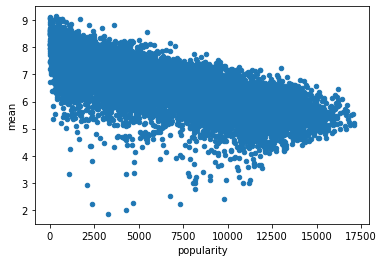

In [323]:
anime_cc.plot.scatter(x="popularity", y="mean")

<AxesSubplot:xlabel='media_type', ylabel='mean'>

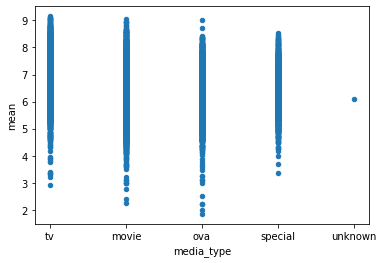

In [329]:
anime_cc.plot.scatter(x="media_type", y= "mean")

<AxesSubplot:xlabel='num_scoring_users', ylabel='mean'>

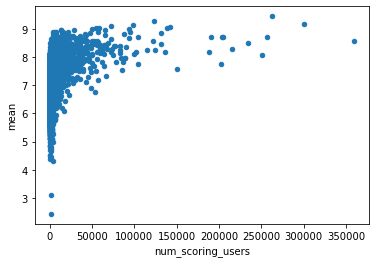

In [324]:
manga_cc.plot.scatter(x="num_scoring_users", y="mean")

<AxesSubplot:>

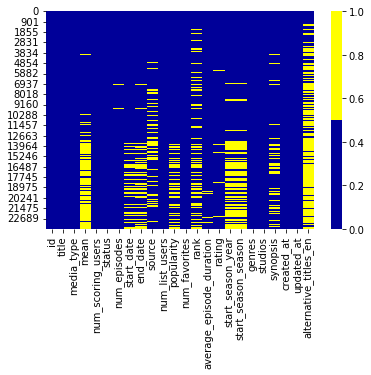

In [326]:
cols =anime_cc.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(anime_cc[cols].isnull(), cmap= sns.color_palette(colours))

<AxesSubplot:>

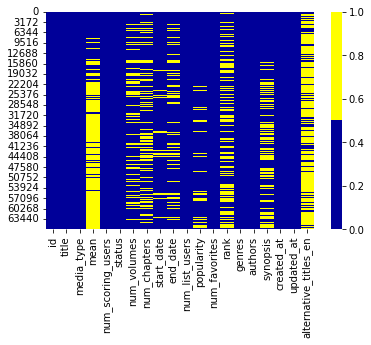

In [327]:
cols = manga_cc.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(manga_cc[cols].isnull(), cmap= sns.color_palette(colours))

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? i did find all 4, this dataset needs work.
2. Did the process of cleaning your data give you new insights into your dataset? There's a lot of null values since its an active dataset as there are many old anime that are stillbeing updated like one piece( it has been going on since the 90s) but I can't get rid as it is one of the most popular anime ever. I cleaned the columns that are necessary for me to make a good informed decision on the project, but there will still be nulls since I cant get rid of them or skew the whole dataset. 
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? Nulls, there was also an unknown that I need to look out for. the genres are also going to be an issue since mostly every anime/ manga hasmultiple different genres.